In [2]:
import requests
import zipfile
import pandas as pd

### Fetch the dataset

In [3]:
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip')
zipcontent= response.content
with open("/tmp/student.zip", 'wb') as f:
    f.write(zipcontent)

zip_ref = zipfile.ZipFile('/tmp/student.zip', 'r')
zip_ref.extractall('/tmp/student/')
zip_ref.close()

### Load the datasets for grades in Maths and Portuguese

In [4]:
df_mat = pd.read_csv('/tmp/student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('/tmp/student/student-por.csv', delimiter=';')

### Have a brief look at the dataset content

In [5]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Check if there are any outliers in the dataset

In [6]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Convert categorical variables to one hot encoding, keep numerical vars as is.

In [7]:
df_mat = pd.get_dummies(df_mat)
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
G3                   395 non-null int64
school_GP            395 non-null uint8
school_MS            395 non-null uint8
sex_F                395 non-null uint8
sex_M                395 non-null uint8
address_R            395 non-null uint8
address_U            395 non-null uint8
famsize_GT3    

### Binary categorical variables can be encoding using only 1 var, so let's delete the other var

In [8]:
redundant_vars = [
    'school_MS',
    'sex_M',
    'address_U',
    'famsize_LE3',
    'Pstatus_T',
    'schoolsup_no',
    'famsup_no',
    'paid_no',
    'activities_no',
    'nursery_no',
    'higher_no',
    'internet_no',
    'romantic_no'
]
df_mat.drop(redundant_vars, axis=1, inplace=True)
df_mat.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


### Correlations for success in Maths

In [9]:
corr_mat = df_mat.corr()
corr_mat_G3 = df_mat.corr()['G3']
corr_mat_G3.sort_values()

failures            -0.360415
age                 -0.161579
goout               -0.132791
romantic_yes        -0.129970
traveltime          -0.117142
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
reason_course       -0.098950
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
health              -0.061335
Dalc                -0.054660
Fjob_other          -0.053483
Walc                -0.051939
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
Fjob_at_home        -0.013385
freetime             0.011307
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
absences             0.034247
school_GP            0.045017
famrel               0.051363
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_servi

In [10]:
df_por = pd.get_dummies(df_por)
df_por.drop(redundant_vars, axis=1, inplace=True)
df_por.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


### Correlations for success in Portuguese

In [11]:
corr_por = df_por.corr()
corr_por_G3 = df_por.corr()['G3']
corr_por_G3 = corr_por_G3.sort_values()

## Train linear regression model on the Maths dataset

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [120]:
X = df_mat.copy()
#X.drop(['failures','G1','G2','G3'], axis=1, inplace=True)
X.drop(['G3'], axis=1, inplace=True)
y= df_mat['G3']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [122]:
model = LinearRegression()
model.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Train set MSE

In [123]:
y_train_predict = model.predict(X_train)
mean_squared_error(y_train, y_train_predict)

2.958844886497314

### Test set MSE

In [124]:
y_test_predict = model.predict(X_test)
mean_squared_error(y_test, y_test_predict)
model.score(X_test,y_test)

0.7719736060288552

## Train decision tree regressor on the Maths dataset

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
model2 = DecisionTreeRegressor(min_samples_leaf=10, min_impurity_decrease=0.1, max_features=10, min_samples_split=10, max_depth=12)
model2.fit(X_train.values, y_train.values)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.1,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Train set MSE

In [20]:
y_train_predict = model2.predict(X_train)
mean_squared_error(y_train, y_train_predict)

16.23144274688392

### Test set MSE

In [21]:
y_test_predict = model2.predict(X_test)
mean_squared_error(y_test, y_test_predict)

20.004943332829253

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

(array([38.,  0.,  0.,  0.,  1.,  7., 15.,  9., 32., 28., 56., 47., 31.,
        31., 27., 33., 16.,  6., 12.,  5.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Patch objects>)

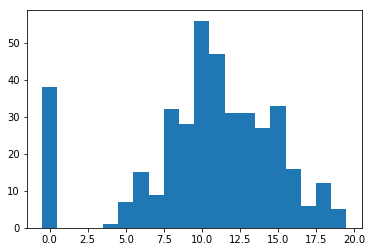

In [23]:
plt.hist(df_mat.G3,bins=np.arange(-0.5,20.5,1))

In [24]:
CORR = 0.1
correlated_vars = corr_mat_G3.index[(corr_mat_G3 > CORR) | (corr_mat_G3 < -CORR)]

In [42]:
"""n = len(correlated_vars)
fig,axn = plt.subplots(n,1,figsize=(20,100))
    
#for c,ax in zip(df_mat.columns,axn):
    #ax = sns.boxplot(x=c, y='G3', data=df_mat)
for c,ax in zip(df_mat.columns, axn[:]):
    sns.boxplot(x=c, y='G3', data=df_mat, ax=ax)
"""

"n = len(correlated_vars)\nfig,axn = plt.subplots(n,1,figsize=(20,100))\n    \n#for c,ax in zip(df_mat.columns,axn):\n    #ax = sns.boxplot(x=c, y='G3', data=df_mat)\nfor c,ax in zip(df_mat.columns, axn[:]):\n    sns.boxplot(x=c, y='G3', data=df_mat, ax=ax)\n"

In [43]:
"""df_mat.hist(bins=20,figsize=(20,25))"""

'df_mat.hist(bins=20,figsize=(20,25))'

In [44]:
"""
from pandas.tools.plotting import scatter_matrix
attributes = correlated_vars
scatter_matrix(df_mat[attributes], figsize=(12, 8))
"""

'\nfrom pandas.tools.plotting import scatter_matrix\nattributes = correlated_vars\nscatter_matrix(df_mat[attributes], figsize=(12, 8))\n'

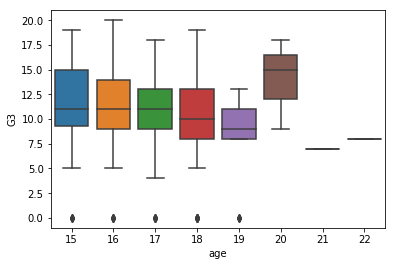

In [28]:
sns.boxplot(x='age', y='G3', data=df_mat)

In [45]:
pd.DataFrame(model.coef_,index=X_train.columns).sort_values(0)

,0
address_R,-1.841250
romantic_yes,-1.839663
schoolsup_yes,-1.666729
school_GP,-1.631516
sex_F,-1.441741
Mjob_teacher,-1.233570
famsup_yes,-0.860352
goout,-0.756000
Fjob_services,-0.734789
Fjob_at_home,-0.721737


In [125]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train
X_test_scaled = X_test

In [126]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=5, min_impurity_decrease=0.01, max_features=15, min_samples_split=3, max_depth=8)
#m = LinearRegression()
m.fit(X_train_scaled, y_train)
y_train_predict1 = m.predict(X_train_scaled)
print(mean_squared_error(y_train, y_train_predict1))
y_test_predict1 = m.predict(X_test_scaled)
print(mean_squared_error(y_test, y_test_predict1))

m.score(X_test_scaled,y_test)

1.9017903336902413
4.2131651865670925


0.8081561762764858

In [127]:
pd.DataFrame(m.feature_importances_,index=X_train.columns).sort_values(0)

,0
Fjob_health,0.000000
Fjob_at_home,0.000110
reason_other,0.000193
Pstatus_A,0.000278
Mjob_health,0.000317
Mjob_teacher,0.000479
school_GP,0.000587
internet_yes,0.000600
Fjob_teacher,0.000702
address_R,0.000866


In [128]:
df_test = pd.DataFrame(data={'true':y_test,'predicted':y_test_predict1,'baseline':np.full_like(y_test_predict1,mean_train)})

In [138]:
df_test['mse_baseline']=(df_test.baseline - df_test.true)**2
df_test['mse_model']=(df_test.predicted - df_test.true)**2
df_test['G2'] = X_test.G2
df_test['mse_G2']=(df_test.G2 - df_test.true)**2

In [139]:
df_test.mean()

baseline        10.246622
predicted        9.663519
true             9.757576
mse_baseline    22.200598
mse_model        4.213165
G2              10.040404
mse_G2           3.898990
dtype: float64

In [137]:
y_train

365    10
298    14
214    10
394     9
117    13
331    14
325    11
167    16
16     14
121    15
146     0
268    10
390     9
339    10
307     8
349    13
308    12
30     12
343     0
186    11
83     15
316     0
313    11
80     12
213     8
63      9
91     18
263     9
45      6
89      7
       ..
58      9
364    12
387     0
242     0
66     12
346    16
357    11
107    18
85      8
179    11
62      9
136     0
71     10
178     9
229    12
97     10
87     14
362    10
189    10
296     0
191     9
148     0
372    11
222    17
22     16
165    12
140     0
332     0
183     8
310     0
Name: G3, Length: 296, dtype: int64

In [134]:
df_test.head()

,baseline,predicted,true,mse_baseline,mse_model,G2,mse_G2
55,10.246622,8.937062,10,0.060822,1.129836,NaN,NaN
377,10.246622,8.570761,10,0.060822,2.042724,NaN,NaN
171,10.246622,14.409397,16,33.101363,2.530017,NaN,NaN
217,10.246622,6.478561,8,5.047309,2.314776,NaN,NaN
259,10.246622,6.652003,0,104.993255,44.249140,NaN,NaN


In [36]:
mean_train = y_train.mean()

In [37]:
print(mean_squared_error(y_train, np.full_like(y_train,mean_train)))
print(mean_squared_error(y_test, np.full_like(y_test,mean_train)))

21.72635135135135
19.262626262626263


In [38]:
m2 = DecisionTreeRegressor(min_samples_leaf=10, min_impurity_decrease=0.1, max_features=10, min_samples_split=10, max_depth=12)
m2.fit(X_train_scaled, y_train)
y_train_predict1 = m2.predict(X_train_scaled)
print(mean_squared_error(y_train, y_train_predict1))
y_test_predict1 = m2.predict(X_test_scaled)
print(mean_squared_error(y_test, y_test_predict1))

15.258266111580417
25.40310267335622


In [39]:
from sklearn.tree import export_graphviz
import datetime
import os

FEATURES = X_train_scaled.columns

i = str(datetime.datetime.now())

trees_path = '.'

filename_dot = os.path.join(trees_path, 'tree' + '.dot')
filename_png = os.path.join(trees_path, 'tree' + '.png')
with open(filename_dot, 'w') as f:
    f = export_graphviz(m2, out_file=f, feature_names=FEATURES)
    
!dot -Tpng $filename_dot -o $filename_png

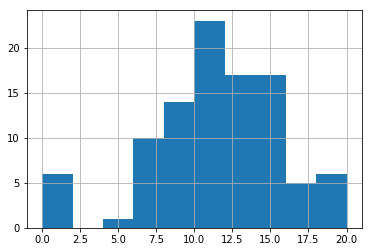

In [40]:
y_test.hist()

-0.3792756675543141